<a href="https://colab.research.google.com/github/SARA3SAEED/LLM-2/blob/main/9Ass_Image_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import requests

urls = [
    "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSOftxJI-vav2nJr7TvY4M05SKjQTmZ1WTHzAOtryz5HHx8QcPgTbRW_6N5xxx-eYIug0A&usqp=CAU",
    "https://images.ctfassets.net/hrltx12pl8hq/28ECAQiPJZ78hxatLTa7Ts/2f695d869736ae3b0de3e56ceaca3958/free-nature-images.jpg?fit=fill&w=1200&h=630",
    "https://imgv3.fotor.com/images/cover-photo-image/AI-illustration-of-a-dragon-by-Fotor-AI-text-to-image-generator.jpg",
    'https://i.pinimg.com/736x/50/08/ef/5008efb9df96969624d2674645027a3a.jpg',
    'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSpkv2x4ss-1JweY4tCEIiB2czBvfJPDTsHQA&s',
    'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcREoRGyXmHy_6aIgXYqWHdOT3KjfmnuSyxypw&s',
    'https://tinypng.com/images/social/website.jpg',
    'https://tse1.mm.bing.net/th/id/OET.7252da000e8341b2ba1fb61c275c1f30?w=594&h=594&c=7&rs=1&o=5&pid=1.9'
    'https://avatars.mds.yandex.net/i?id=b507a2b8d9382967a186c654f1eeaa74-5262078-images-taas-consumers&n=27&h=480&w=480',
    'https://images.ctfassets.net/kftzwdyauwt9/MQfhRnDbcxc2gaHN0yKdP/fb7711a0bac4d739e415059e6d7e5a64/Anastronautridingahorseinaphotorealisticstyle6.jpg?w=3840&q=90&fm=webp'

]

images = [Image.open(requests.get(url, stream=True).raw) for url in urls]

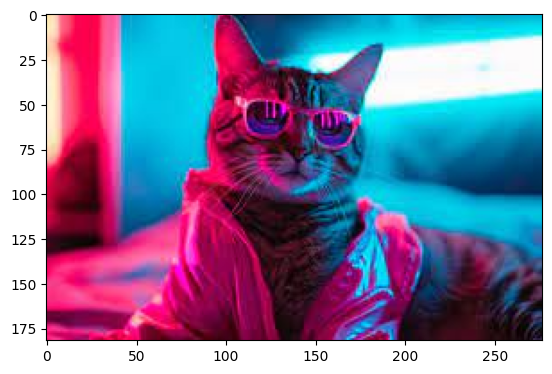

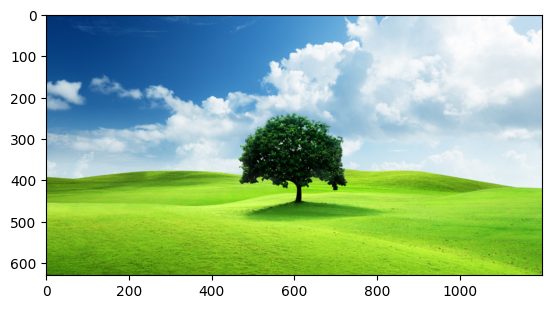

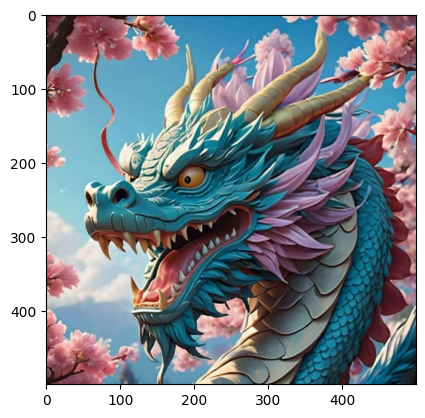

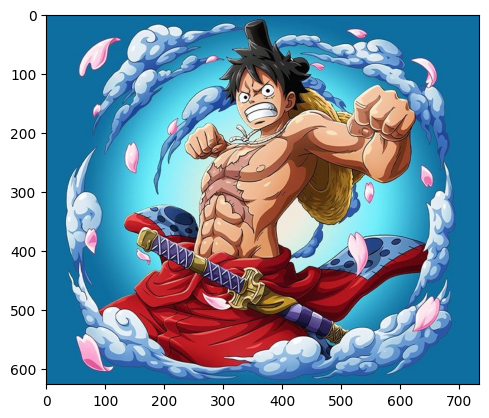

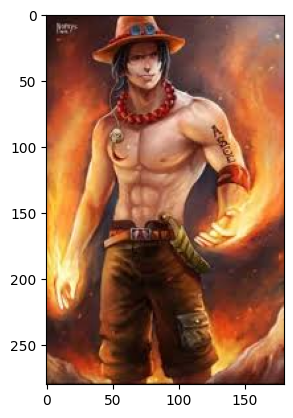

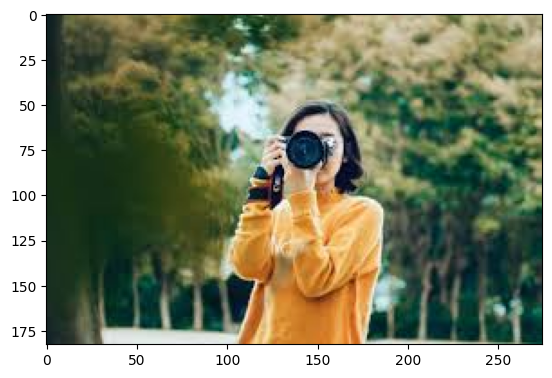

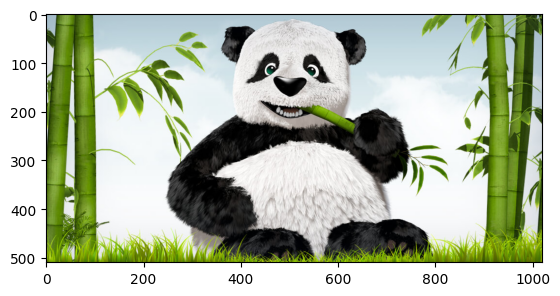

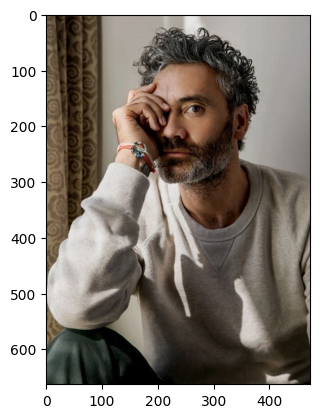

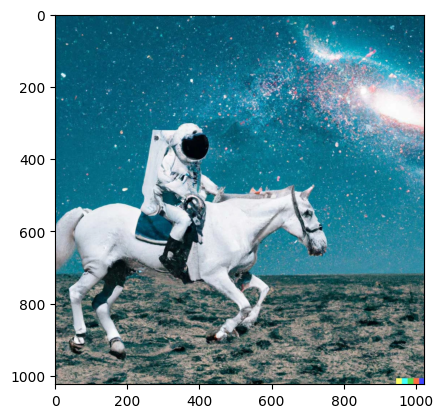

In [ ]:

for image in images:

    plt.show(plt.imshow(np.asarray(image)))

In [ ]:

from PIL import Image
import requests
from transformers import AutoProcessor, TFBlipForQuestionAnswering

model_ = TFBlipForQuestionAnswering.from_pretrained("Salesforce/blip-vqa-base")
processor_ = AutoProcessor.from_pretrained("Salesforce/blip-vqa-base")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.54G [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBlipForQuestionAnswering: ['text_encoder.embeddings.position_ids', 'text_decoder.bert.embeddings.position_ids']
- This IS expected if you are initializing TFBlipForQuestionAnswering from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBlipForQuestionAnswering from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBlipForQuestionAnswering were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBlipForQuestionAnswering for predictions without further training.


preprocessor_config.json:   0%|          | 0.00/445 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [ ]:
captions=[]
for i, image in enumerate(images):
  text = "describe image"
  inputs = processor_(images=image, text=text, return_tensors="tf")
  outputs = model_.generate(**inputs)
  captions.append(processor_.decode(outputs[0], skip_special_tokens=True))

/usr/local/lib/python3.10/dist-packages/transformers/generation/tf_utils.py:837: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length.  recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


In [ ]:
captions #generate text for images

['cat in hat',
 'tree',
 'dragon',
 'man with sword',
 'man with sword',
 'woman',
 'panda',
 'man',
 'horse and rider']


---------------------

# Here the search engine starts




In [ ]:
from transformers import CLIPProcessor, CLIPModel

model = CLIPModel.from_pretrained('openai/clip-vit-base-patch32')
processor = CLIPProcessor.from_pretrained('openai/clip-vit-base-patch32')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [ ]:
text=str(input())
inputs = processor(text=[text], images=images,return_tensors='pt', padding=True)

outputs = model(**inputs)

probs=outputs.logits_per_image

Monky D.luffy


In [ ]:
logits =probs.squeeze()
threshold=25
indices = torch.nonzero(logits > threshold).squeeze().tolist()

the images that you are looking for was



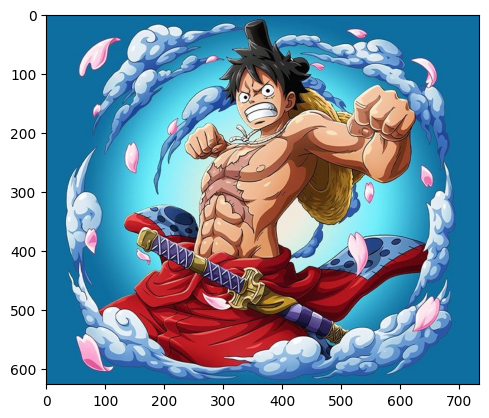

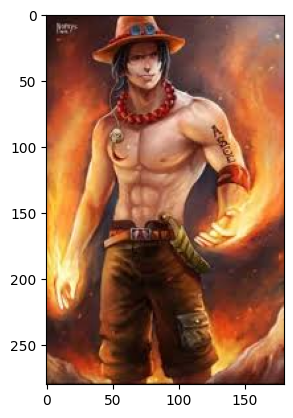

In [ ]:
print('the images that you are looking for was\n')
for i in indices:
  plt.show( plt.imshow(images[i]))